In [174]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('feat_eng_df.csv')
df.head()

,Date,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,...,new_deaths_50_min,new_deaths_100_min,vaccination_rate_1dose,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus
0,2020-03-01,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,5.810037,5.990525,6.557529,2.031935,1.845802
1,2020-03-02,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,5.810037,5.990525,6.557529,2.031935,1.845802
2,2020-03-03,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,5.810037,5.990525,6.557529,2.031935,1.845802
3,2020-03-04,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,5.810037,5.990525,6.557529,2.031935,1.845802
4,2020-03-05,1,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,5.810037,5.990525,6.557529,2.031935,1.845802


In [162]:
df.shape

(39500, 248)

In [163]:
columns = df.columns.tolist()
print(columns)

['Date', 'STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_POSITIVE_CASES_COUNT', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_

In [164]:
#remove female & male specific age bin columns

fem_cols_remove = ['AGE04_FEM', 'AGE59_FEM', 'AGE1014_FEM', 'AGE1519_FEM', 'AGE2024_FEM', 'AGE2529_FEM', 'AGE3034_FEM', 'AGE3539_FEM', 'AGE4044_FEM', 'AGE4549_FEM', 'AGE5054_FEM', 'AGE5559_FEM', 'AGE6064_FEM', 'AGE6569_FEM', 'AGE7074_FEM', 'AGE7579_FEM', 'AGE8084_FEM', 'AGE85PLUS_FEM']
male_cols_remove = ['AGE04_MALE', 'AGE59_MALE', 'AGE1014_MALE', 'AGE1519_MALE', 'AGE2024_MALE', 'AGE2529_MALE', 'AGE3034_MALE', 'AGE3539_MALE', 'AGE4044_MALE', 'AGE4549_MALE', 'AGE5054_MALE', 'AGE5559_MALE', 'AGE6064_MALE', 'AGE6569_MALE', 'AGE7074_MALE', 'AGE7579_MALE', 'AGE8084_MALE', 'AGE85PLUS_MALE']
other_cols_remove = ['AGE59_TOT', 'TOT_MALE', 'TOT_FEMALE', 'PEOPLE_POSITIVE_CASES_COUNT']

In [165]:
#how many cols should be dropped after removing above columns
print(2*len(fem_cols_remove) + 4)

40


In [166]:
df_2 = df.drop(columns = fem_cols_remove)
df_2 = df_2.drop(columns = male_cols_remove)
df_2 = df_2.drop(columns = other_cols_remove)
print(len(df_2.columns))

208


In [167]:
print(df_2.columns.to_list())

['Date', 'STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT', 'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE'

In [168]:
#columns to remove after creating larger age bins
small_age_bin_columns = ['AGE04_TOT', 'AGE1014_TOT', 'AGE1519_TOT', 'AGE2024_TOT', 'AGE2529_TOT', 'AGE3034_TOT', 'AGE3539_TOT', 'AGE4044_TOT', 'AGE4549_TOT', 'AGE5054_TOT', 'AGE5559_TOT', 'AGE6064_TOT', 'AGE6569_TOT', 'AGE7074_TOT', 'AGE7579_TOT', 'AGE8084_TOT', 'AGE85PLUS_TOT']
print(len(small_age_bin_columns))

#non-target rolling statistic columns to drop
roll_columns_drop = ['administered_dose1_recip_10_mean', 'administered_dose1_recip_50_mean', 'administered_dose1_recip_100_mean', 'administered_dose1_recip_10_std', 'administered_dose1_recip_50_std', 'administered_dose1_recip_100_std', 'administered_dose1_recip_10_max', 'administered_dose1_recip_50_max', 'administered_dose1_recip_100_max', 'administered_dose1_recip_10_min', 'administered_dose1_recip_50_min', 'administered_dose1_recip_100_min']

17


In [169]:
#create larger age bins:
#sum: age04_tot through age2529_tot, sum: age3034_tot through age_5559_tot, sum: age6064_tot through age85plus_tot'

# Sum the age bins as specified
df_2['AGE04_29_TOT'] = df_2[['AGE04_TOT', 'AGE1014_TOT', 'AGE1519_TOT', 'AGE2024_TOT', 'AGE2529_TOT']].sum(axis=1)
df_2['AGE30_59_TOT'] = df_2[['AGE3034_TOT', 'AGE3539_TOT', 'AGE4044_TOT', 'AGE4549_TOT', 'AGE5054_TOT', 'AGE5559_TOT']].sum(axis=1)
df_2['AGE60PLUS_TOT'] = df_2[['AGE6064_TOT', 'AGE6569_TOT', 'AGE7074_TOT', 'AGE7579_TOT', 'AGE8084_TOT', 'AGE85PLUS_TOT']].sum(axis=1)

#remove the old columns:

df_2 = df_2.drop(columns = small_age_bin_columns)
df_2 = df_2.drop(columns = roll_columns_drop)
print(len(df_2.columns.tolist()))

182


In [170]:
df_2.shape

(39500, 182)

In [171]:
print(df_2.columns.tolist())

['Date', 'STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT', 'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE'

In [172]:
df_2.drop(columns = ['PEOPLE_DEATH_COUNT'], inplace = True)

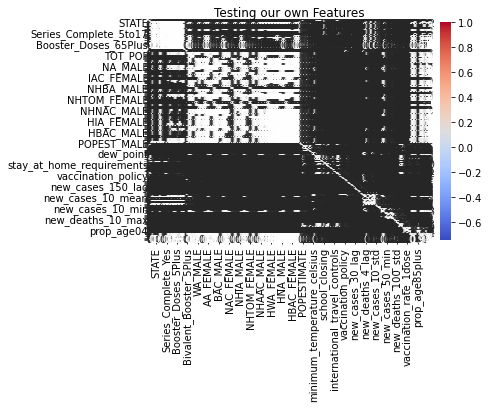

In [175]:
featue_test_matrix = df_2.corr()
sns.heatmap(featue_test_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Testing our own Features')
plt.show()

In [176]:
#save df_2 with features
df_2.to_csv('multivariate_eng_df.csv')

In [177]:
df_2.shape

(39500, 181)